In [19]:
# import the libraries
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [20]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [23]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=[ 'BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Attrition','Over18', 'StockOptionLevel', 'StandardHours'])



cleaned_data.head()

,Age,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,2,Life Sciences,1,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,279,Research & Development,1,Life Sciences,2,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,Other,4,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,591,Research & Development,1,Medical,7,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2


In [24]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,362433.299749,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,15.702015,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [25]:
# Check the values of Department column
cleaned_data['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [26]:
# Check the value for MaritalStatus column
cleaned_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [27]:
# Check the value for EducationField column
cleaned_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [28]:
cleaned_data.head()


,Age,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,2,Life Sciences,1,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,279,Research & Development,1,Life Sciences,2,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,Other,4,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,591,Research & Development,1,Medical,7,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2


In [29]:
# Group the data by 'Marital_Status'
grouped_data = cleaned_data.groupby('MaritalStatus')

# Now you can perform operations on each group, such as calculating summary statistics
# For example, to get the mean monthly income for each marital status:
mean_income_by_marital_status = grouped_data['MonthlyIncome'].mean()

# You can also iterate over the groups if you need to perform more complex operations
for marital_status, group_df in grouped_data:
    print(f"Marital Status: {marital_status}")
    print (group_df)


Marital Status: Divorced
      Age  DailyRate              Department  Education EducationField  \
7      30       1358  Research & Development          1  Life Sciences   
12     31        670  Research & Development          1  Life Sciences   
13     34       1346  Research & Development          2        Medical   
15     29       1389  Research & Development          4  Life Sciences   
16     32        334  Research & Development          2  Life Sciences   
...   ...        ...                     ...        ...            ...   
1441   56        667  Research & Development          4  Life Sciences   
1447   36        301                   Sales          4      Marketing   
1448   41        930                   Sales          3  Life Sciences   
1452   50        878                   Sales          4  Life Sciences   
1461   50        410                   Sales          3      Marketing   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
7                

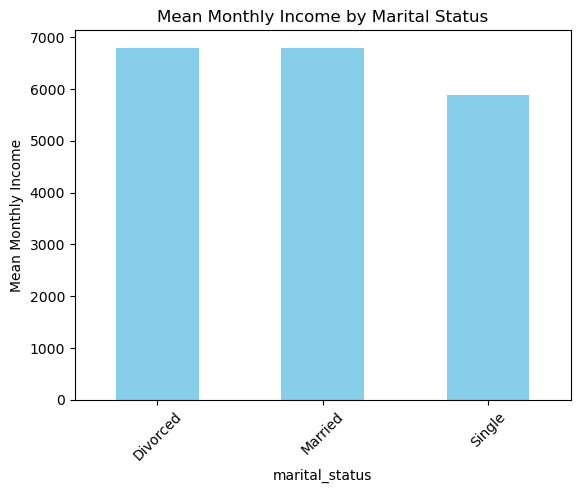

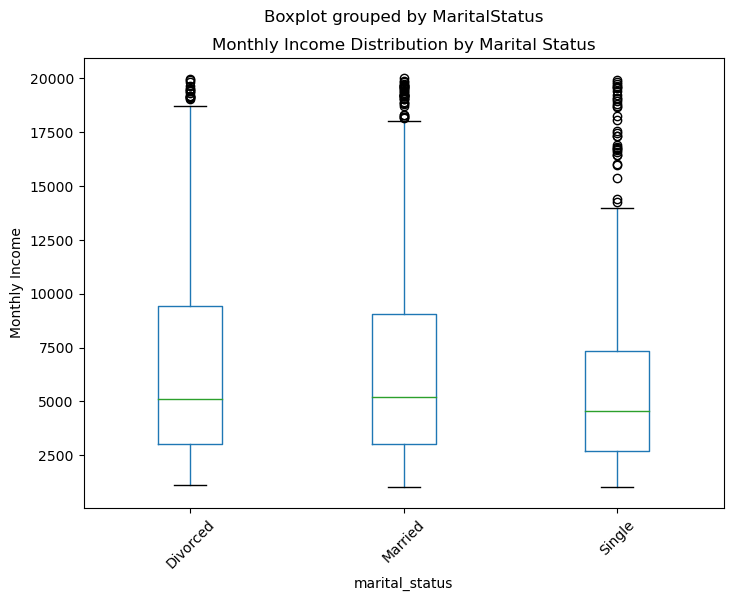

In [35]:
import matplotlib.pyplot as plt

# Assuming you have already grouped the data by 'Marital_Status' and calculated mean monthly income
# using grouped_data['MonthlyIncome'].mean()

# Plotting a bar plot
mean_income_by_marital_status.plot(kind='bar', color='skyblue')
plt.title('Mean Monthly Income by Marital Status')
plt.xlabel('marital_status')
plt.ylabel('Mean Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Plotting a box plot
cleaned_data.boxplot(column='MonthlyIncome', by='MaritalStatus', grid=False, figsize=(8, 6))
plt.title('Monthly Income Distribution by Marital Status')
plt.xlabel('marital_status')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


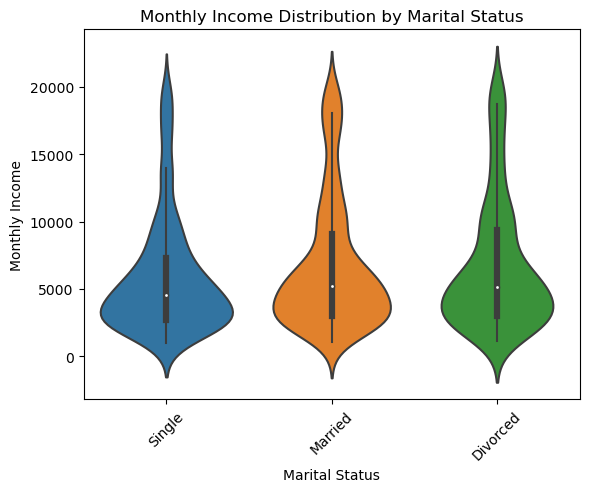

In [37]:
import seaborn as sns

sns.violinplot(x='MaritalStatus', y='MonthlyIncome', data=cleaned_data)
plt.title('Monthly Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


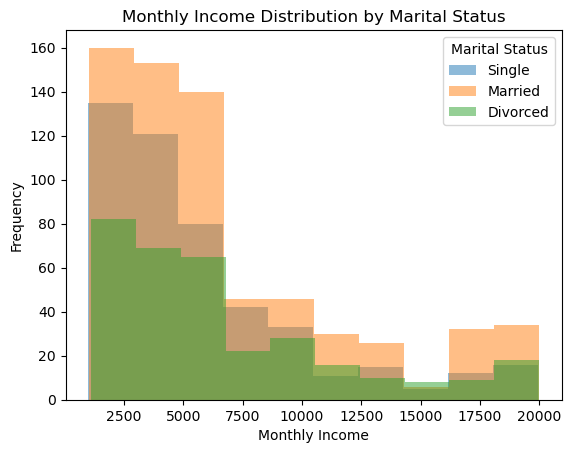

In [38]:
# Plotting histograms for each marital status category
for status in cleaned_data['MaritalStatus'].unique():
    subset = cleaned_data[cleaned_data['MaritalStatus'] == status]
    plt.hist(subset['MonthlyIncome'], alpha=0.5, label=status)

plt.title('Monthly Income Distribution by Marital Status')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.legend(title='Marital Status')
plt.show()


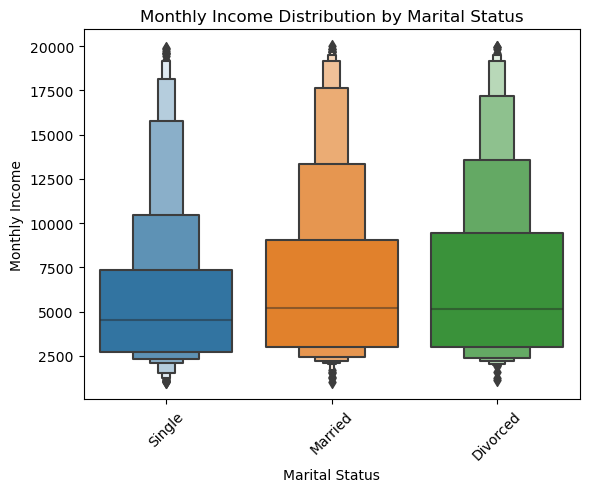

In [40]:
sns.boxenplot(x='MaritalStatus', y='MonthlyIncome', data=cleaned_data)
plt.title('Monthly Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


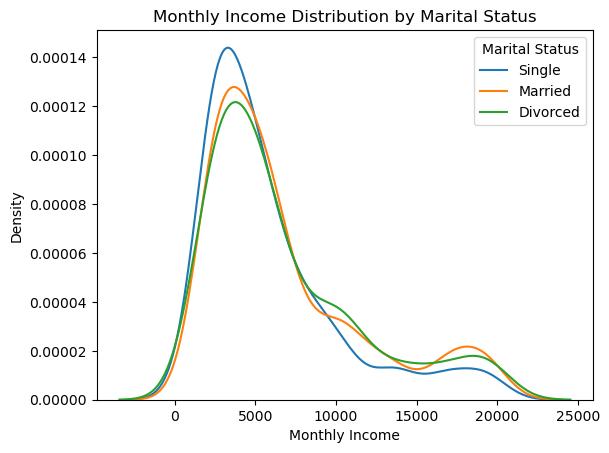

In [41]:
# Plotting KDE plots for each marital status category
for status in cleaned_data['MaritalStatus'].unique():
    subset = cleaned_data[cleaned_data['MaritalStatus'] == status]
    sns.kdeplot(subset['MonthlyIncome'], label=status)

plt.title('Monthly Income Distribution by Marital Status')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend(title='Marital Status')
plt.show()


In [42]:
import numpy as np

# Calculate mean, median, and standard deviation for each group
summary_stats = grouped_data['MonthlyIncome'].agg(['mean', 'median', 'std'])

# Identify outliers using the 1.5*IQR rule
q1 = grouped_data['MonthlyIncome'].quantile(0.25)
q3 = grouped_data['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = {}
for marital_status, group_df in grouped_data:
    outliers[marital_status] = group_df[(group_df['MonthlyIncome'] < lower_bound[marital_status]) | (group_df['MonthlyIncome'] > upper_bound[marital_status])]

# Print summary statistics and outliers
print("Summary Statistics:")
print(summary_stats)

print("\nOutliers:")
for marital_status, outlier_df in outliers.items():
    print(f"Marital Status: {marital_status}")
    print(outlier_df)
    print()


Summary Statistics:
                      mean  median          std
MaritalStatus                                  
Divorced       6786.287462  5131.0  4845.647590
Married        6793.671620  5204.0  4859.686276
Single         5889.472340  4536.0  4325.571133

Outliers:
Marital Status: Divorced
      Age  DailyRate              Department  Education    EducationField  \
25     53       1282  Research & Development          3             Other   
233    50        854                   Sales          4           Medical   
257    40       1416  Research & Development          2           Medical   
279    50        797  Research & Development          1     Life Sciences   
400    39       1218  Research & Development          1     Life Sciences   
473    49       1245  Research & Development          4     Life Sciences   
535    41        427         Human Resources          4   Human Resources   
716    41        840  Research & Development          3           Medical   
746    41  

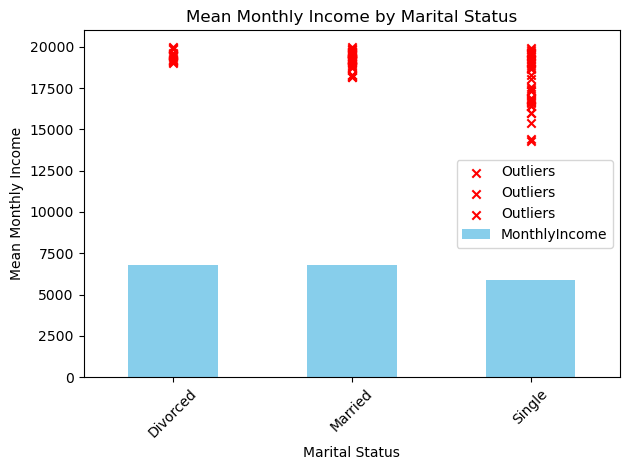

In [43]:
import matplotlib.pyplot as plt

# Plotting mean monthly income by marital status
mean_income_by_marital_status.plot(kind='bar', color='skyblue')
plt.title('Mean Monthly Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Monthly Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Highlighting outliers
for marital_status, outlier_df in outliers.items():
    plt.scatter([marital_status] * len(outlier_df), outlier_df['MonthlyIncome'], color='red', marker='x', label='Outliers')

plt.legend()
plt.tight_layout()
plt.show()
